## Calculate $\pi$ using Monte Carlo method

In [4]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
def square(l, ax):
    '''plot a square with each side=2*l'''
    ax.plot([-l, l], [-l, -l], 'k-')
    ax.plot([-l, l], [l, l], 'k-')
    ax.plot([-l, -l], [-l, l], 'k-')
    ax.plot([l, l], [-l, l], 'k-')

def circle(r, ax):
    '''plot a circle with radius=r'''
    theta = np.linspace(0, 2*np.pi, 100)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, 'k-')

In [ ]:
def calculate_pi(r=1, N=100):
    '''calculate pi from 4 *N_in / N_out '''
    x = np.random.uniform(-r, r, N)
    y = np.random.uniform(-r, r, N)
    dist = np.sqrt(x**2 + y**2) 
    pi_mc = 4*len(x[dist<r]) / N
    
    return pi_mc

In [139]:
def plot_mc(r=1, N=100):
    '''calculate pi from 4 *N_in / N_out and plot'''
    x = np.random.uniform(-r, r, N)
    y = np.random.uniform(-r, r, N)
    dist = np.sqrt(x**2 + y**2)

    fig, ax = pl.subplots(figsize=(5, 5))
    square(r, ax)
    circle(r, ax)
    ax.scatter(x[dist<r], y[dist<r], color='r')
    ax.scatter(x[dist>r], y[dist>r], color='k')
    pi_mc = 4*len(x[dist<r]) / N
    pl.title('N = %i, $\pi$ = %.2f'%(N,pi_mc))
    
    return pi_mc

3.44

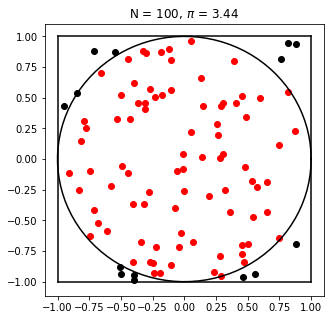

In [140]:
plot_mc(r=1, N=100)

3.172

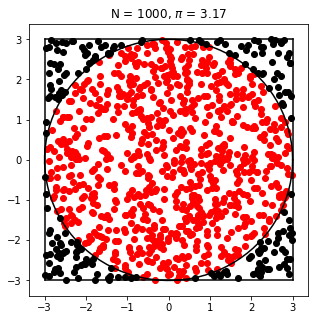

In [138]:
plot_mc(r=3, N=1000)

In [134]:
N = np.arange(1, 10000, 100)
pi_mc = []
for Ni in N:
    pi_mc.append(calculate_pi(r=1, N=Ni))

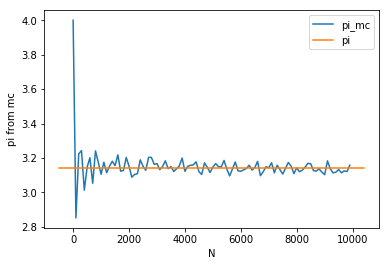

In [135]:
pl.plot(N, pi_mc, label='pi_mc')
pl.plot(pl.xlim(), [np.pi] * 2, label='pi')
pl.xlabel('N')
pl.ylabel('pi from mc')
pl.legend()

##### Figure 1. The calculated $\pi$ vs. number of random points $N$. The accuracy of calculated value increases with the increase of $N$.